In [1]:
%run data_exploration.ipynb
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(have_ratings_tags["tag"])
have_ratings_tags['tag']=le.transform(have_ratings_tags["tag"])
have_ratings_tags.head()

,userId,movieId,rating,tag,average_ratings
0,2,60756,5.0,510,4.1875
1,2,60756,5.0,604,4.1875
2,2,60756,5.0,1416,4.1875
3,62,60756,3.5,295,4.1875
4,62,60756,3.5,510,4.1875


* Here we are going to remove the user id column because it is irrelevant.

In [2]:
del have_ratings_tags['userId']

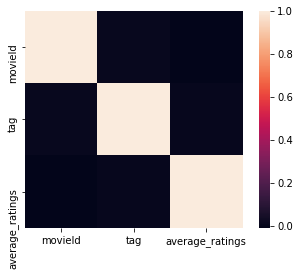

In [3]:
import seaborn as sns
have_ratings_tags_temp = have_ratings_tags[['movieId', 'tag','average_ratings']] #Subsetting the data
cor = have_ratings_tags_temp.corr()
sns.heatmap(cor, square = True)

### DBSCAN Clustering Begins

In [17]:
# Taking sample data set as X
X = have_ratings_tags.iloc[:,[2, 3]].values

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [21]:
min_samples = have_ratings_tags.shape[1]+1 #  Rule of thumb; number of dimensions D in the data set, as minPts ≥ D + 1
dbscan = DBSCAN(eps=3, min_samples=min_samples).fit(X)

#### Visualizing DBScan and K-means

Text(0.5, 1.0, 'DBSCAN')

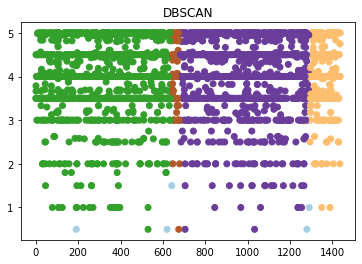

In [22]:
y_pred = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

Text(0.5, 1.0, 'K-means')

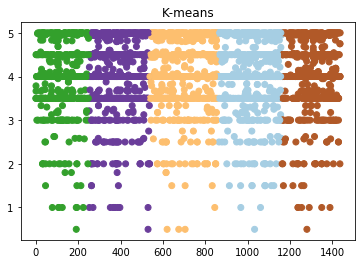

In [23]:
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("K-means")

#### Conclusion

* We notice that there is an overlap between kmeans and DBscans when clustering moveies

* There is almost an identical cluster and two of the k-means clusters can be combined to get the DBSCAN cluster

* Another two clusters can also be combined to get the other kmeans cluster